### k-최근접 이웃 회귀
농어의 길이(특성)로 무게(타깃) 예측하기

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

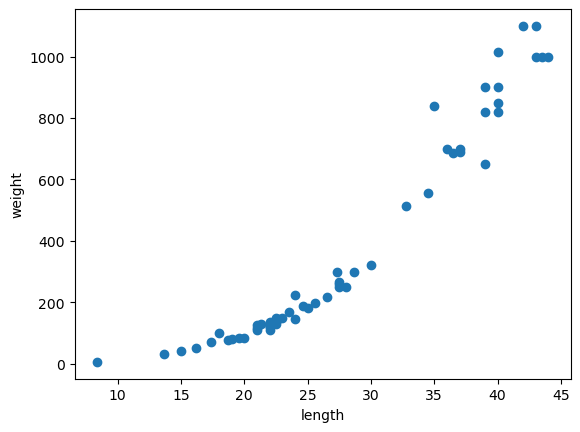

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
#%conda install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(perch_length, perch_weight, random_state=42)       

reshape 메서드를 이용하여 배열 크기 바꿔보기

In [5]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [6]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [7]:
train_input = train_input.reshape(-1, 1) # -1을 지정하면 나머지 원소 갯수로 모두 채운다.
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

회귀 모델 훈련시켜보기

In [8]:
from sklearn.neighbors import KNeighborsRegressor 
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

#### 결정계수(R^2) 구하기
- 회귀는 예측이기 때문에 정확한 숫자를 맞힌다는 것은 거의 불가능
- 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더한 값 / 타깃과 타깃 평균 차이를 제곱하여 더한 값
    - 예측이 정확할 수록 1에 가까운 값이 출력된다.

In [9]:
knr.score(test_input, test_target) # 테스트로 점수 확인

0.992809406101064

In [10]:
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차를 평균하여 반환

test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
mae

19.157142857142862

### 과대적합과 과소적합
- 과대적합: 훈련세트 점수 > 테스트세트 점수 (훈련 세트에만 잘 맞는 경우)
- 과소적합: 훈련세트 점수 < 테스트세트 점수 (모델이 단순하여 훈련 세트에 적절히 훈련되지 않은 경우, 각 세트의 크기가 작은 경우)

훈련한 모델을 사용한 훈련 세트의 결정계수 구하기
- 결과 값: 과소적합

In [11]:
knr.score(train_input, train_target)

0.9698823289099254

모델을 복잡하게 만들기 위해 이웃의 갯수(k)를 줄이기
- 훈련 세트에 있는 국지적인 패턴에 민감해진다.
- 결과 값: 과소적합 해결

In [12]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [13]:
knr.score(test_input, test_target)

0.9746459963987609

#### 연습문제

In [14]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [15]:
import numpy as np
x = np.arange(5, 45).reshape(-1,1)

In [16]:
for n in [1,5,10]:
    knr.n_neighbors = n

In [17]:
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=10)

In [18]:
predication = knr.predict(x)

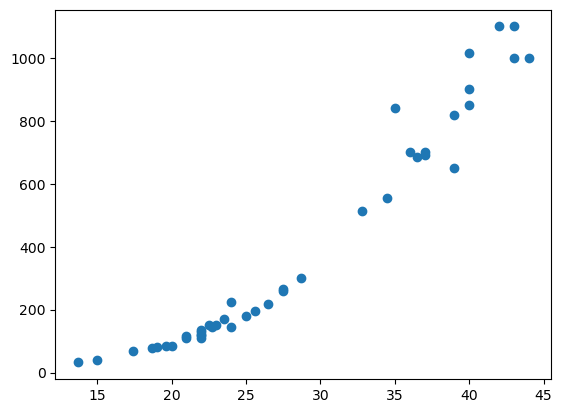

In [19]:
plt.scatter(train_input, train_target)


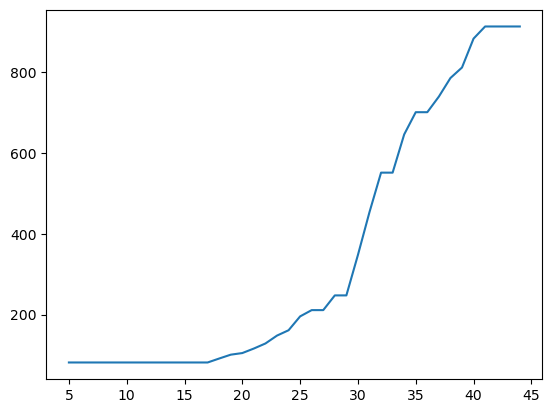

In [20]:
plt.plot(x, predication)

Text(0.5, 1.0, 'n_neighbors = 10')

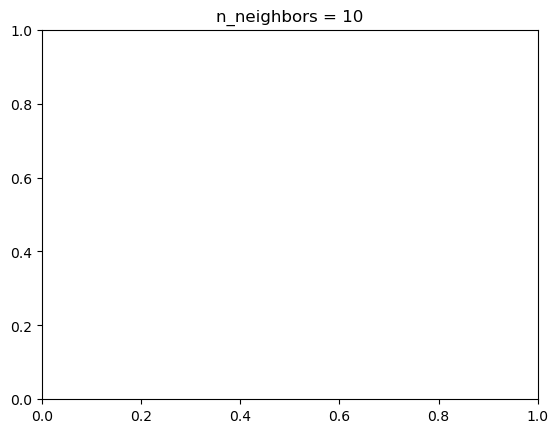

In [21]:
plt.title('n_neighbors = {}'.format(n))

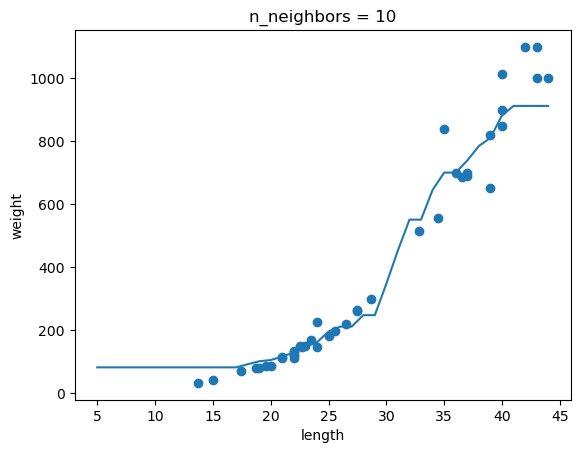

In [22]:
x = np.arange(5, 45).reshape(-1,1)
for n in [1,5,10]:
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    predication = knr.predict(x)
plt.scatter(train_input, train_target)
plt.plot(x, predication)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()